# Análisis de datos meteorológicos - Preprocesamiento

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iscolab = True

# Corrección de formato de las bases de datos

In [2]:
if iscolab:
    from google.colab import drive
    drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
if iscolab:
    %cd "/content/gdrive/MyDrive/Colab Notebooks/IA_Temperatura"
##Se cargan los conjuntos de datos
datosS2_2019 = pd.read_csv("datos/Estacion2_2019.csv",sep=';',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS2_2020 = pd.read_csv("datos/Estacion2_2020.csv",sep=',',names=[ 'ID'])
datosS2_2021 = pd.read_csv("datos/Estacion2_2021.csv",sep=',',names=[ 'ID'])
datosS3_2019 = pd.read_csv("datos/Estacion3_2019.csv",sep=';',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS3_2020 = pd.read_csv("datos/Estacion3_2020.csv",sep=',',names=[ 'ID'])
datosS3_2021 = pd.read_csv("datos/Estacion3_2021.csv",sep=',',names=[ 'ID'])
datosS4_2019 = pd.read_csv("datos/Estacion4_2019.csv",sep=';',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS4_2020 = pd.read_csv("datos/Estacion4_2020.csv",sep=',',names=[ 'ID'])
datosS4_2021 = pd.read_csv("datos/Estacion4_2021.csv",sep=',',names=[ 'ID'])

/content/gdrive/MyDrive/Colab Notebooks/IA_Temperatura


In [4]:
##En los datasets de 2020 y 2021 los datos tienen ubicados comillas de manera errónea, entonces se eliminan.
datosS2_2020["ID"] = datosS2_2020["ID"].str.replace('"','')
datosS2_2021["ID"] = datosS2_2021["ID"].str.replace('"','')
datosS3_2020["ID"] = datosS3_2020["ID"].str.replace('"','')
datosS3_2021["ID"] = datosS3_2021["ID"].str.replace('"','')
datosS4_2020["ID"] = datosS4_2020["ID"].str.replace('"','')
datosS4_2021["ID"] = datosS4_2021["ID"].str.replace('"','')

In [5]:
##Se diveden los conjuntos de datos en columnas, con coma como separador
datosS2_2020 = datosS2_2020["ID"].str.split(',',expand=True)
datosS2_2021 = datosS2_2021["ID"].str.split(',',expand=True)
datosS3_2020 = datosS3_2020["ID"].str.split(',',expand=True)
datosS3_2021 = datosS3_2021["ID"].str.split(',',expand=True)
datosS4_2020 = datosS4_2020["ID"].str.split(',',expand=True)
datosS4_2021 = datosS4_2021["ID"].str.split(',',expand=True)

In [6]:
##Se guardan en csv corregidos los datos con formato correcto
datosS2_2020.to_csv("datos/Estacion2_2020_Corregido.csv",header=False,index=False)
datosS2_2021.to_csv("datos/Estacion2_2021_Corregido.csv",header=False,index=False)
datosS3_2020.to_csv("datos/Estacion3_2020_Corregido.csv",header=False,index=False)
datosS3_2021.to_csv("datos/Estacion3_2021_Corregido.csv",header=False,index=False)
datosS4_2020.to_csv("datos/Estacion4_2020_Corregido.csv",header=False,index=False)
datosS4_2021.to_csv("datos/Estacion4_2021_Corregido.csv",header=False,index=False)

In [7]:
##Se cargan los conjuntos de datos corregidos
datosS2_2020 = pd.read_csv("datos/Estacion2_2020_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS2_2021 = pd.read_csv("datos/Estacion2_2021_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS3_2020 = pd.read_csv("datos/Estacion3_2020_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS3_2021 = pd.read_csv("datos/Estacion3_2021_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS4_2020 = pd.read_csv("datos/Estacion4_2020_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])
datosS4_2021 = pd.read_csv("datos/Estacion4_2021_Corregido.csv",sep=',',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'])

# Preprocesamiento

In [8]:
%mkdir Imagenes
##Se crean bases de datos con todos los años
datosS2 = pd.concat([datosS2_2019,datosS2_2020,datosS2_2021],ignore_index=True)
datosS3 = pd.concat([datosS3_2019,datosS3_2020,datosS3_2021],ignore_index=True)
datosS4 = pd.concat([datosS4_2019,datosS4_2020,datosS4_2021],ignore_index=True)

mkdir: cannot create directory ‘Imagenes’: File exists


In [9]:
##Luego, se reemplaza el índice numérico por índices basados en el dato temporal de cada medición
datosS2["datetime"] = pd.to_datetime(datosS2.fecha +" "+datosS2.hora)
datosS2.set_index(["datetime"],drop=True, inplace=True)
datosS2.head()

,ID,fecha,hora,MP1,MP2.5,MP10,Temperatura,Humedad,Presión,Batería
datetime,,,,,,,,,,
2019-04-17 09:15:00,1,17-04-2019,9:15,5.500,8.429,37.619,24.5,62.5,1002.8,82
2019-04-17 09:20:00,2,17-04-2019,9:20,3.889,5.210,7.889,25.1,61.3,1002.9,82
2019-04-17 09:25:00,3,17-04-2019,9:25,3.289,5.069,24.629,25.9,59.1,1001.7,80
2019-04-17 09:30:00,4,17-04-2019,9:30,11.109,14.259,20.869,26.5,57.4,998.8,80
2019-04-17 09:35:00,5,17-04-2019,9:35,10.659,13.399,15.779,26.9,56.3,1000.1,80


In [10]:
datosS3["datetime"] = pd.to_datetime(datosS3.fecha +" "+datosS3.hora)
datosS3.set_index(["datetime"],drop=True, inplace=True)
datosS3.head()

,ID,fecha,hora,MP1,MP2.5,MP10,Temperatura,Humedad,Presión,Batería
datetime,,,,,,,,,,
2019-07-04 07:50:00,1,07-04-2019,7:50,50.360,68.860,72.369,20.2,75.3,1004.7,100
2019-07-04 07:55:00,2,07-04-2019,7:55,43.479,59.889,64.169,20.6,74.1,1004.7,100
2019-07-04 08:00:00,3,07-04-2019,8:00,72.489,93.989,97.379,20.8,74.0,1004.8,100
2019-07-04 08:05:00,4,07-04-2019,8:05,33.459,44.840,46.379,21.2,71.8,1004.8,99
2019-07-04 08:10:00,5,07-04-2019,8:10,30.629,42.099,50.529,21.4,72.0,1004.8,99


In [11]:
datosS4["datetime"] = pd.to_datetime(datosS4.fecha +" "+datosS4.hora)
datosS4.set_index(["datetime"],drop=True, inplace=True)
datosS4.head()

,ID,fecha,hora,MP1,MP2.5,MP10,Temperatura,Humedad,Presión,Batería
datetime,,,,,,,,,,
2019-01-04 00:00:00,429,01-04-2019,0:00,19.049,24.000,25.239,25.8,78.3,1001.5,90
2019-01-04 00:05:00,430,01-04-2019,0:05,18.369,23.739,27.389,25.7,78.8,1001.4,90
2019-01-04 00:10:00,431,01-04-2019,0:10,19.180,24.399,24.869,25.6,79.7,1001.3,90
2019-01-04 00:15:00,432,01-04-2019,0:15,20.309,26.129,28.149,25.5,81.3,1001.2,90
2019-01-04 00:20:00,433,01-04-2019,0:20,19.379,24.559,30.789,25.5,83.0,1001.1,90


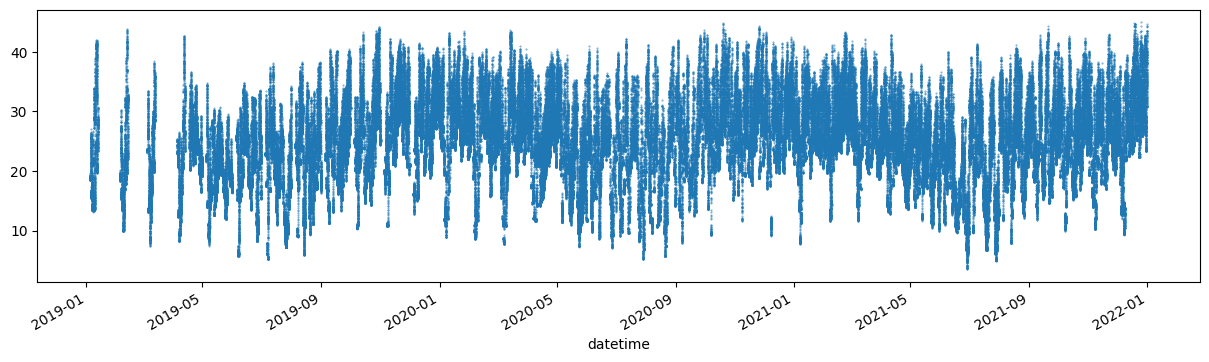

In [12]:
##Se visualizan los datos como serie temporal
datosS2["Temperatura"].plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est2RAW.png")

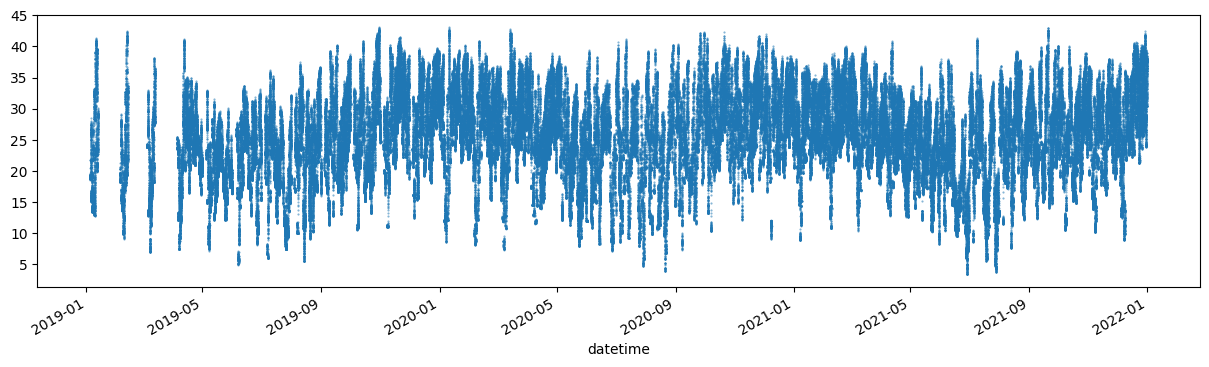

In [13]:
datosS3["Temperatura"].plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est3RAW.png")

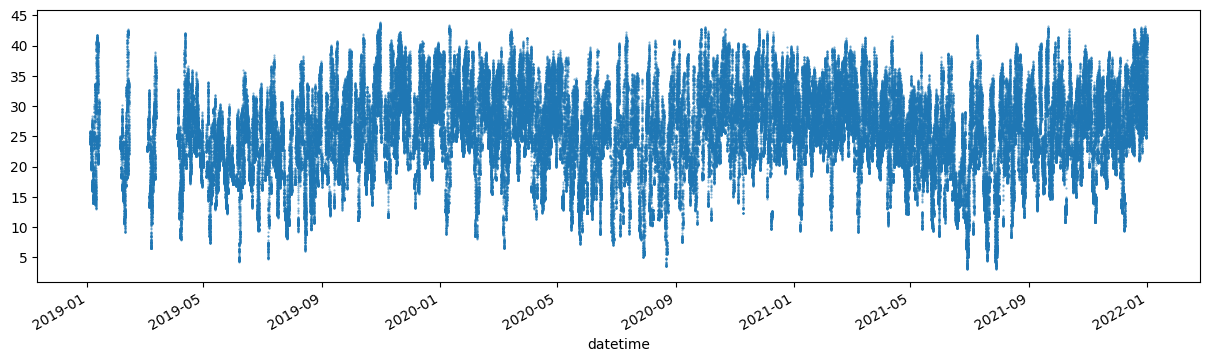

In [14]:
datosS4["Temperatura"].plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est4RAW.png")

In [15]:
##Se realiza un muestreo de los datos cada 1 hora.
dfEst2H = datosS2.resample('60min').mean()
dfEst2H = dfEst2H["Temperatura"]
dfEst3H = datosS3.resample('60min').mean()
dfEst3H = dfEst3H["Temperatura"]
dfEst4H = datosS4.resample('60min').mean()
dfEst4H = dfEst4H["Temperatura"]

<ipython-input-15-c3e1d6ebc17c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfEst2H = datosS2.resample('60min').mean()
<ipython-input-15-c3e1d6ebc17c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfEst3H = datosS3.resample('60min').mean()
<ipython-input-15-c3e1d6ebc17c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfEst4H = datosS4.resample('60min').mean()


In [16]:
dfEst2H.head()

datetime
2019-01-05 00:00:00    19.116667
2019-01-05 01:00:00    19.091667
2019-01-05 02:00:00    18.900000
2019-01-05 03:00:00    18.658333
2019-01-05 04:00:00    18.591667
Freq: 60T, Name: Temperatura, dtype: float64

In [17]:
dfEst3H.head()

datetime
2019-01-05 00:00:00    19.275000
2019-01-05 01:00:00    19.291667
2019-01-05 02:00:00    19.116667
2019-01-05 03:00:00    18.941667
2019-01-05 04:00:00    18.725000
Freq: 60T, Name: Temperatura, dtype: float64

In [18]:
dfEst4H.head()

datetime
2019-01-04 00:00:00    25.575000
2019-01-04 01:00:00    25.625000
2019-01-04 02:00:00    25.041667
2019-01-04 03:00:00    24.708333
2019-01-04 04:00:00    24.525000
Freq: 60T, Name: Temperatura, dtype: float64

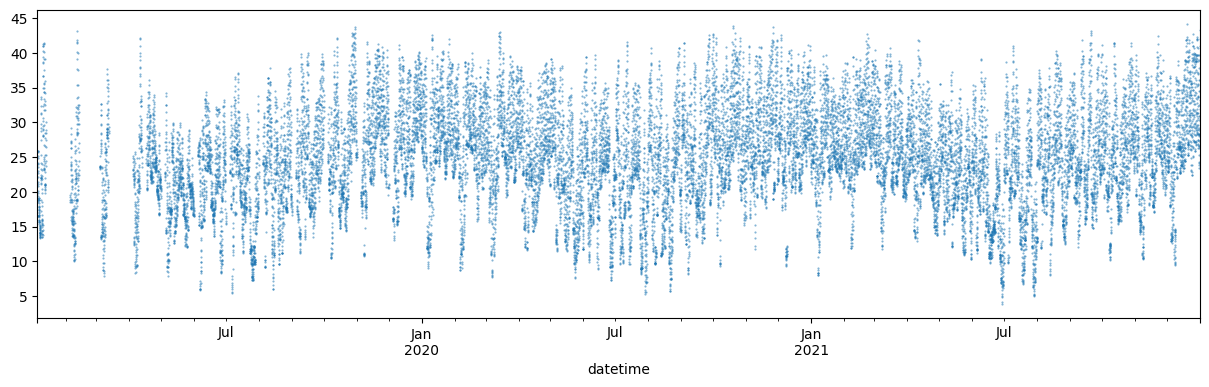

In [19]:
##Se visualizan los datos muestreados
dfEst2H.plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est2RAW_Res.png")

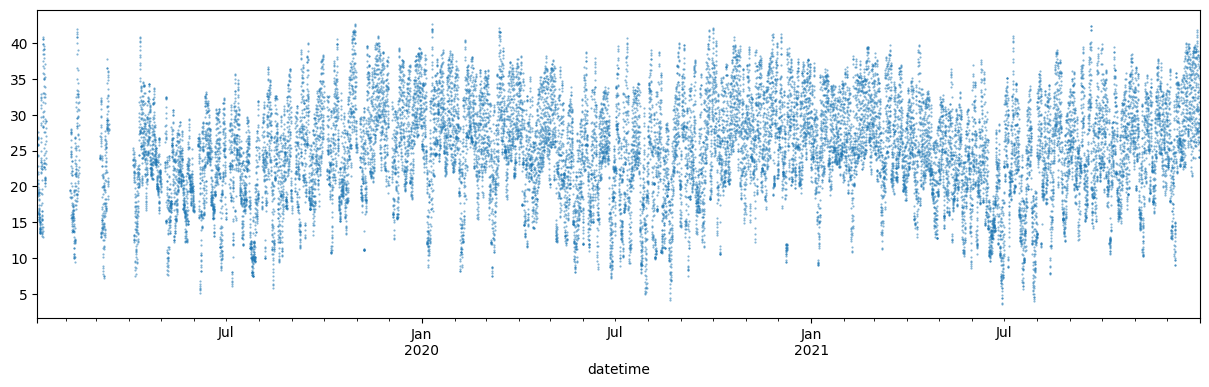

In [20]:
dfEst3H.plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est3RAW_Res.png")

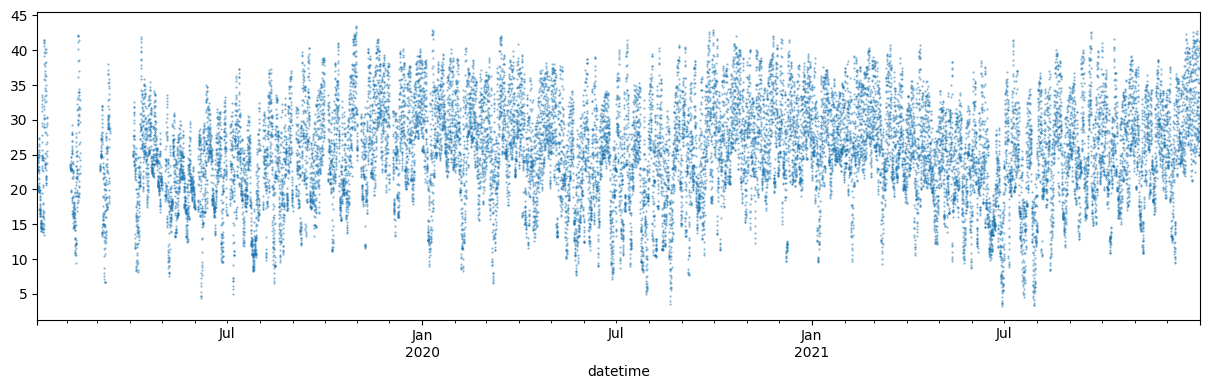

In [21]:
dfEst4H.plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.savefig("Imagenes/Est4RAW_Res.png")

In [22]:
##Se imprime la cantidad de datos faltantes en los conjuntos de datos
print("En la Estación 2 faltan "+str(dfEst2H.isna().sum())+" datos.")
print("En la Estación 3 faltan "+str(dfEst3H.isna().sum())+" datos.")
print("En la Estación 4 faltan "+str(dfEst4H.isna().sum())+" datos.")

En la Estación 2 faltan 2460 datos.
En la Estación 3 faltan 2217 datos.
En la Estación 4 faltan 2090 datos.


In [23]:
##Se deben llenar los datos faltantes. Para ello, se hará uso de un conjunto de datos de otra
#estación.
datosNasaAsu = pd.read_csv("datos/Temp_Asu20092021.csv",sep=',')
datosNasaAsu["datetime"] = pd.to_datetime(datosNasaAsu.Fecha)
datosNasaAsu.set_index(["datetime"],drop=True, inplace=True)
datosNasaAsu = datosNasaAsu["Temperatura"]
datosNasaAsu.head()

datetime
2009-01-01 00:00:00    26.749483
2009-01-01 03:00:00    25.956114
2009-01-01 06:00:00    23.707357
2009-01-01 09:00:00    23.726823
2009-01-01 12:00:00    29.606379
Name: Temperatura, dtype: float64

In [24]:
##Debido a la gran falta de valores al comienzo del conjunto de datos, entonces se iniciará el análisis 
#desde 01/05/2019 00:00:00

In [25]:
indicesNasa = np.logical_and((datosNasaAsu.index >= pd.to_datetime("05/01/2019 00:00:00")),(datosNasaAsu.index <= pd.to_datetime("31/12/2021 23:00:00")))
indicesEst2 = np.logical_and((dfEst2H.index >= pd.to_datetime("05/01/2019 00:00:00")),(dfEst2H.index <= pd.to_datetime("31/12/2021 23:00:00")))
indicesEst3 = np.logical_and((dfEst3H.index >= pd.to_datetime("05/01/2019 00:00:00")),(dfEst3H.index <= pd.to_datetime("31/12/2021 23:00:00")))
indicesEst4 = np.logical_and((dfEst4H.index >= pd.to_datetime("05/01/2019 00:00:00")),(dfEst4H.index <= pd.to_datetime("31/12/2021 23:00:00")))

In [26]:
##Con los índices nuevos, se obtienen los nuevos conjuntos de datos delimitados
datosNasa = datosNasaAsu[indicesNasa]
datosEst2 = dfEst2H[indicesEst2]
datosEst3 = dfEst3H[indicesEst3]
datosEst4 = dfEst4H[indicesEst4]
datosNasa.rename("Temp_NASA",inplace=True)
datosEst2.rename("Temp_Est2",inplace=True)
datosEst3.rename("Temp_Est3",inplace=True)
datosEst4.rename("Temp_Est4",inplace=True)

datetime
2019-05-01 00:00:00          NaN
2019-05-01 01:00:00          NaN
2019-05-01 02:00:00          NaN
2019-05-01 03:00:00          NaN
2019-05-01 04:00:00          NaN
                         ...    
2021-12-31 19:00:00    35.658333
2021-12-31 20:00:00    34.000000
2021-12-31 21:00:00    33.108333
2021-12-31 22:00:00    32.116667
2021-12-31 23:00:00    31.275000
Freq: 60T, Name: Temp_Est4, Length: 23424, dtype: float64

In [27]:
##Se crea un solo dataframe que contenga todos los conjuntos de datos en diferentes columnas
dataframeEstaciones = pd.DataFrame(datosEst2)
dataframeEstaciones = dataframeEstaciones.join(datosEst3)
dataframeEstaciones = dataframeEstaciones.join(datosEst4)
dataframeEstaciones = dataframeEstaciones.join(datosNasa)
dataframeEstaciones
##Se guarda la cantida de datos de la base de datos
N = dataframeEstaciones["Temp_NASA"].shape
N = N[0]

In [28]:
##Como los datos de la NASA son cada 3 horas, se hace una interpolación lineal
#bajo la suposición de que en 3 horas la temperatura varía de manera lineal aproximadamente.
dataframeEstaciones["Temp_NASA"] = dataframeEstaciones["Temp_NASA"].interpolate(method='quadratic')
##Como los 2 ultimos datos no pudieron ser interpolados cuadráticamnte, entonces se
#Calculará de manera manual:
m1 = (dataframeEstaciones["Temp_Est2"][N-2] - dataframeEstaciones["Temp_Est2"][N-3] +
      dataframeEstaciones["Temp_Est3"][N-2] - dataframeEstaciones["Temp_Est3"][N-3] +
      dataframeEstaciones["Temp_Est4"][N-2] - dataframeEstaciones["Temp_Est4"][N-3])/3
m2 = (dataframeEstaciones["Temp_Est2"][N-1] - dataframeEstaciones["Temp_Est2"][N-2] +
      dataframeEstaciones["Temp_Est3"][N-1] - dataframeEstaciones["Temp_Est3"][N-2] +
      dataframeEstaciones["Temp_Est4"][N-1] - dataframeEstaciones["Temp_Est4"][N-2])/3
dataframeEstaciones["Temp_NASA"][N-2] = dataframeEstaciones["Temp_NASA"][N-3] + m1
dataframeEstaciones["Temp_NASA"][N-1] = dataframeEstaciones["Temp_NASA"][N-2] + m2
dataframeEstaciones

,Temp_Est2,Temp_Est3,Temp_Est4,Temp_NASA
datetime,,,,
2019-05-01 00:00:00,NaN,NaN,NaN,20.198735
2019-05-01 01:00:00,NaN,NaN,NaN,19.832973
2019-05-01 02:00:00,NaN,NaN,NaN,19.587328
2019-05-01 03:00:00,NaN,NaN,NaN,19.461803
2019-05-01 04:00:00,NaN,NaN,NaN,19.456396
...,...,...,...,...
2021-12-31 19:00:00,36.075000,34.866667,35.658333,40.460799
2021-12-31 20:00:00,34.508333,33.775000,34.000000,39.261059
2021-12-31 21:00:00,33.233333,32.575000,33.108333,37.645491


In [29]:
print("En la Estación 2 faltan "+str(dataframeEstaciones["Temp_Est2"].isna().sum())+" datos.")
print("En la Estación 3 faltan "+str(dataframeEstaciones["Temp_Est3"].isna().sum())+" datos.")
print("En la Estación 4 faltan "+str(dataframeEstaciones["Temp_Est4"].isna().sum())+" datos.")
print("En la NASA faltan "+str(dataframeEstaciones["Temp_NASA"].isna().sum())+" datos.")
##Llegado a este punto, se puede crear una nueva columna con el cual se tendrá el promedio de los valores que no sean NaN

En la Estación 2 faltan 771 datos.
En la Estación 3 faltan 633 datos.
En la Estación 4 faltan 578 datos.
En la NASA faltan 0 datos.


In [30]:
N

23424

In [31]:
##Se crea una nueva columna que contandrá el promedio de los datos de las estaciones
dataframeEstaciones["Promedio"] = np.zeros([N,1])

In [32]:
##Para cada fila, se halla el promedio de los valores.
for i in range(0,N):
    n = 1
    val = dataframeEstaciones["Temp_NASA"][i]
    if(dataframeEstaciones["Temp_Est2"].isna()[i]==False):
        val = val + dataframeEstaciones["Temp_Est2"][i]
        n = n + 1
    if(dataframeEstaciones["Temp_Est3"].isna()[i]==False):
        val = val + dataframeEstaciones["Temp_Est3"][i]
        n = n + 1
    if(dataframeEstaciones["Temp_Est4"].isna()[i]==False):
        val = val + dataframeEstaciones["Temp_Est4"][i]
        n = n + 1
    val = val/n
    dataframeEstaciones["Promedio"][i] = val

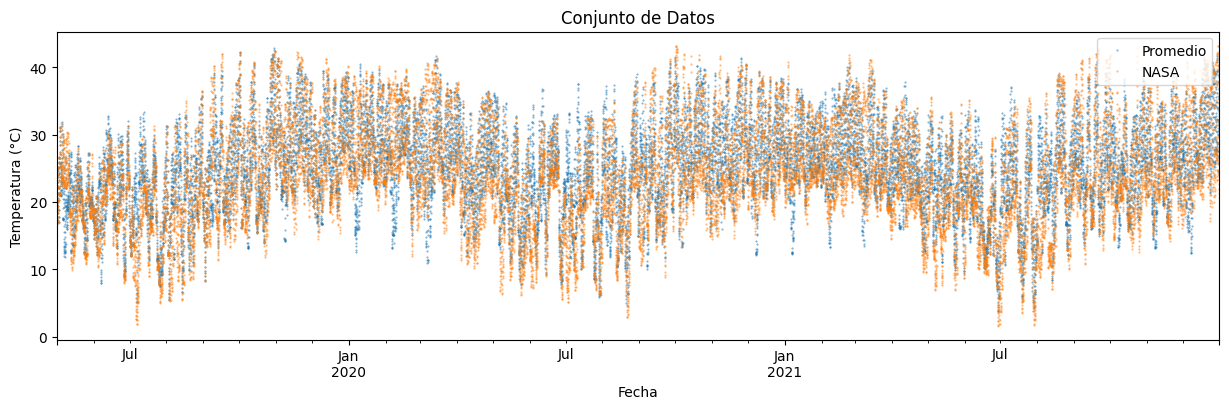

In [33]:
##Se grafican los conjuntos de datos del promedio y de la NASA.
dataframeEstaciones["Promedio"].plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
dataframeEstaciones["Temp_NASA"].plot( marker='.',markersize=1, linestyle='None', alpha=0.6, figsize=(15, 4))
plt.title('Conjunto de Datos')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend(['Promedio','NASA'],loc='upper right')
plt.show
plt.savefig("Imagenes/EstProm_NASAinterp_Res1H.png")

In [34]:
##Ahora, se agruparán los datos en X e Y. Para ello será necesario definir el window: puntos temporales de entrada, y step:
#puntos temporales de salida.
window = 24*7
step = 24*1
X_est = np.zeros([N-step-window+1,window])
Y_est = np.zeros([N-step-window+1,step])
X_NASA = np.zeros([N-step-window+1,window])
Y_NASA = np.zeros([N-step-window+1,step])

for i in range(0,N-step-window+1):
    X_est[i][range(0,window)] = dataframeEstaciones["Promedio"][range(i,i+window)]
    Y_est[i][range(0,step)] = dataframeEstaciones["Promedio"][range(i+window,i+window+step)]
    X_NASA[i][range(0,window)] = dataframeEstaciones["Temp_NASA"][range(i,i+window)]
    Y_NASA[i][range(0,step)] = dataframeEstaciones["Temp_NASA"][range(i+window,i+window+step)]

##Ahora que se tienen los conjuntos de datos de entrada y salida, se procederá a separar en conjuntos de entrenamiento y prueba.

In [35]:
dias = 180
X_est_train = X_est[range(0,(N-step-window+1)-24*(dias-1)-1)]
Y_est_train = Y_est[range(0,(N-step-window+1)-24*(dias-1)-1)]
X_est_test = X_est[range((N-step-window+1)-24*(dias-1)-1,(N-step-window+1))]
Y_est_test = Y_est[range((N-step-window+1)-24*(dias-1)-1,(N-step-window+1))]

X_NASA_train = X_NASA[range(0,(N-step-window+1)-24*(dias-1)-1)]
Y_NASA_train = Y_NASA[range(0,(N-step-window+1)-24*(dias-1)-1)]
X_NASA_test = X_NASA[range((N-step-window+1)-24*(dias-1)-1,(N-step-window+1))]
Y_NASA_test = Y_NASA[range((N-step-window+1)-24*(dias-1)-1,(N-step-window+1))]

##Para trabajar con RNN es neceario nromalizar valores para evitar problemas con
#los algoritmos. Para ello se asume un minimo de 0°C y máximo de 50°C para ambos
#conjuntos de datos
def normalizar(input):
  min = 0
  max = 50
  return (input-min)/(max-min)

def desnormalizar(input):
  min = 0
  max = 50
  return input*(max-min) + min

X_est_train_norm = normalizar(X_est_train)
Y_est_train_norm = normalizar(Y_est_train)
X_est_test_norm = normalizar(X_est_test)
Y_est_test_norm = normalizar(Y_est_test)

X_NASA_train_norm = normalizar(X_NASA_train)
Y_NASA_train_norm = normalizar(Y_NASA_train)
X_NASA_test_norm = normalizar(X_NASA_test)
Y_NASA_test_norm = normalizar(Y_NASA_test)

##Por último se hace un reshape de las entradas para que corresponda con el formato
#que debe recibir una RNN:
X_est_train_norm = np.asarray(np.reshape(X_est_train_norm, (X_est_train_norm.shape[0], window, 1)))
X_est_test_norm = np.asarray(np.reshape(X_est_test_norm, (X_est_test_norm.shape[0], window, 1)))
X_NASA_train_norm = np.asarray(np.reshape(X_NASA_train_norm, (X_NASA_train_norm.shape[0], window, 1)))
X_NASA_test_norm = np.asarray(np.reshape(X_NASA_test_norm, (X_NASA_test_norm.shape[0], window, 1)))

##Ahora con los datos separados, se puede proceder al diseño y entrenamiento de las redes

# Aprendizaje: Redes RNN

In [36]:
##Se crea el objeto de regresión lineal para los datos promediados
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU
from keras.metrics import mean_squared_error
from timeit import default_timer as timer
n_neuronas = 4
neuronas = [8, 16, 24, 32]
n_droprates = 4
droprates = [0.0, 0.2, 0.4, 0.7]
n_batchsize = 4
batchsizes = [32, 64, 128, 256]
npred = n_neuronas*n_droprates*n_batchsize

time = dataframeEstaciones.index[N-24*dias:N]
orig = np.array(dataframeEstaciones["Temp_NASA"][N-24*dias:N])

PrediccionesLSTM = np.zeros([npred,dias*24])
Tiempo_Entrenamiento = np.zeros(npred)

# Red LSTM

In [37]:
%mkdir "Imagenes"
%cd "Imagenes"
##Se procede a realizar el entrenamiento de las redes probando los hiperparámetros:
for neu in range(0,n_neuronas):
  for dro in range(0,n_droprates):
    for bat in range(0,n_batchsize):
      time_start = timer()

      modeloLSTM = Sequential()
      modeloLSTM.add( LSTM(neuronas[neu], input_shape=[window,1], name='Capa_Entrada_Recursiva') )
      modeloLSTM.add( Dropout(rate = droprates[dro], name='Capa_Dropout') )
      modeloLSTM.add( Dense(step, activation='linear',name='Capa_De_Salida') )
      modeloLSTM.compile(loss='mean_squared_error', optimizer='adam')
      #modeloLSTM.summary()
      historyLSTM = modeloLSTM.fit(X_NASA_train_norm,Y_NASA_train_norm, epochs=50, batch_size = batchsizes[bat], verbose = 0)
      #Y_est_pred = modeloLSTM.predict(X_est_test_norm)
      #print(metrics.mean_squared_error(Y_est_test_norm, Y_est_pred))
      ##Se hacen lo gráficos del historial evolutivo:
      plt.clf()
      plt.figure(figsize=(8,6))
      plt.plot(historyLSTM.history['loss'])
      #plt.plot(historyRNN.history['val_loss'])
      plt.title('Model Loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train'],loc='upper right')
      ##plt.show
      plt.savefig("LTSM_LossEst_Neuronas({})_Drop({})_BatchSize({}).png".format(neuronas[neu],droprates[dro],batchsizes[bat]))
      plt.clf()
      ##Se procede a realizar el calculo de las predicciones para los ultimos 180 días que comprende el TEST:
      PredLSTM = np.zeros(dias*24);
      for i in range(0,24*dias,24):
        pred = modeloLSTM.predict(X_NASA_test_norm[i].reshape(1,window,1))
        PrediccionesLSTM[bat+dro*n_batchsize+neu*n_batchsize*n_droprates][range(i,i+24)] = pred
      PrediccionesLSTM[bat+dro*n_batchsize+neu*n_batchsize*n_droprates] = desnormalizar(PrediccionesLSTM[bat+dro*n_batchsize+neu*n_batchsize*n_droprates])
      plt.figure(figsize=(15*12,5))
      plt.plot(time,PrediccionesLSTM[bat+dro*n_batchsize+neu*n_batchsize*n_droprates])
      plt.plot(time,orig)
      plt.title('Predicción LSTM (Neuronas={}; Drop Rate={}; Batch Size={})'.format(neuronas[neu],droprates[dro],batchsizes[bat]))
      plt.ylabel('Temperatura (°C)')
      plt.xlabel('Fecha')
      plt.legend(['Predicción','Mediciones Reales'],loc='upper right')
      #plt.show()
      plt.savefig("LTSM_Predic_Neuronas({})_Drop({})_BatchSize({}).png".format(neuronas[neu],droprates[dro],batchsizes[bat]))
      plt.clf()

      time_end = timer()
      Tiempo_Entrenamiento[bat+dro*n_batchsize+neu*n_batchsize*n_droprates] = time_end - time_start  


mkdir: cannot create directory ‘Imagenes’: File exists
/content/gdrive/MyDrive/Colab Notebooks/IA_Temperatura/Imagenes
1/1 [==============================] - 0s 21ms/step


<ipython-input-37-2efd6bbce234>:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15*12,5))


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 18000x500 with 0 Axes>

In [38]:
##Ahora que se hicieron todas las predicciones necesarias, se hará una tabla
#donde se evaluará por medio de MSE cuál es el modelo que predijo mejor:
def mse(x,y):
  if (x.shape[0]!=y.shape[0]):
    raise NameError("Las entradas no tiene las mismas dimensiones")
  dif = x-y
  dif = np.power(dif,2)
  sum = dif.sum()
  return sum/dif.shape[0]


tabla = pd.DataFrame(np.zeros([npred,5]),columns=['Neuronas','Drop Rate', 'Batch Size', 'MSE', 'Tiempo'])
tabla.head()
for i in range(0,n_neuronas):
  for j in range(0,n_droprates):
    for k in range(0,n_batchsize):
      tabla["Neuronas"][k+j*n_batchsize+i*n_batchsize*n_droprates] = neuronas[i]
      tabla["Drop Rate"][k+j*n_batchsize+i*n_batchsize*n_droprates] = droprates[j]
      tabla["Batch Size"][k+j*n_batchsize+i*n_batchsize*n_droprates] = batchsizes[k]
      tabla["MSE"][k+j*n_batchsize+i*n_batchsize*n_droprates] = mse(orig,PrediccionesLSTM[k+j*n_batchsize+i*n_batchsize*n_droprates])
      tabla["Tiempo"][k+j*n_batchsize+i*n_batchsize*n_droprates] = Tiempo_Entrenamiento[k+j*n_batchsize+i*n_batchsize*n_droprates]

In [39]:
tabla

,Neuronas,Drop Rate,Batch Size,MSE,Tiempo
0,8.0,0.0,32.0,12.145330,221.546065
1,8.0,0.0,64.0,12.370603,111.253699
2,8.0,0.0,128.0,13.284503,63.731170
3,8.0,0.0,256.0,14.205135,40.491075
4,8.0,0.2,32.0,13.316790,212.454966
...,...,...,...,...,...
59,32.0,0.4,256.0,14.413627,45.253000
60,32.0,0.7,32.0,13.922654,219.025460
61,32.0,0.7,64.0,14.653619,119.561901
62,32.0,0.7,128.0,15.967912,68.154882


In [40]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
indexMin = 0
minMSE = tabla["MSE"][0]
for i in range(1,npred):
  if(tabla["MSE"][i] < minMSE):
    minMSE = tabla["MSE"][i]
    indexMin = i

In [42]:
indexMin

52

In [43]:
tabla.to_csv("Tabla de Resultados.csv",index=False,header=False)